# Machine Learning Essentials SS25 - Exercise Sheet 8

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For better aesthetics
from sklearn.linear_model import LinearRegression
from scipy.special import binom # Binomial coefficients for polynomial features

sns.set_theme(style="whitegrid")

## Exercise 1
### Task 4

In [50]:
# Generate Synthetic data
n = 60 
beta0, beta1, sigma = 1.0, -0.8, 1.0 # Choose Some values for the true params
x = np.linspace(-3, 3, n) # Clamp imput x to some range

# TODO: Implement data generating function
eps = np.random.normal(0, sigma, n) # noise
y = beta0 + beta1 * x + eps # 1D case

In [51]:
# TODO: Fit OLS model using sklearn
# Form design matrix
X = np.vstack((np.ones_like(x), x)).T

# Fit OLS
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X)

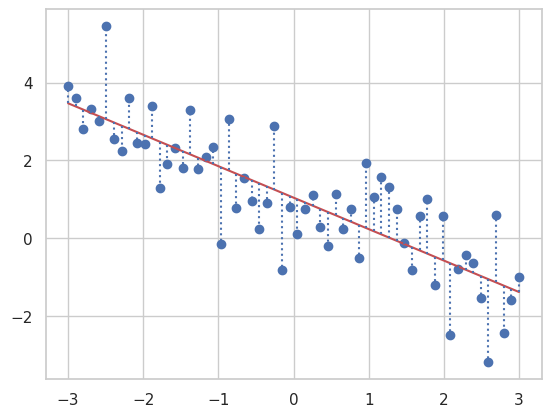

In [52]:
# TODO: Plot data, fitted line and vertical error (residual) bars

plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
# draw vertical residuals
for xi, yi, ypi in zip(x, y, y_pred):
    plt.vlines(xi, ypi, yi, linestyles='dotted')


<Axes: ylabel='Count'>

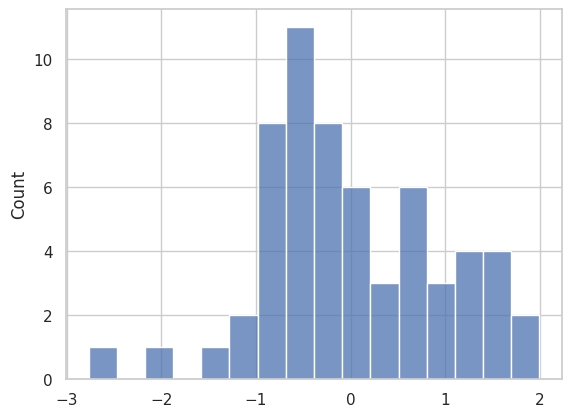

In [43]:
# TODO: Do a histogram of the residuals (e.g. sns.histplot)
residuals = y-y_pred
sns.histplot(residuals, binwidth=0.3)

In [55]:
ll

np.float64(1.784661474292236e-12)

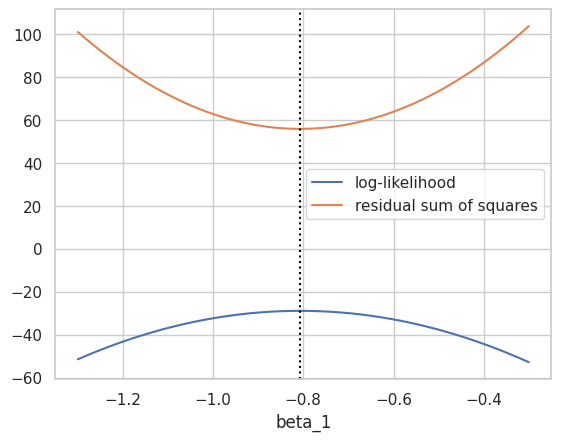

In [65]:
# TODO: Plot the log likelihood and the RSS as a function of beta1. Show visually that MLE and OLS are equivalent for linear regression.
window = 1
n_steps = 60
beta1s = np.linspace(beta1-window/2,beta1+window/2, n_steps)

# Calculate log likelihoods and RSSs
lls = np.array([
    np.log(1/np.sqrt(2*np.pi*sigma**2)* np.exp(-sigma**2/2 * np.dot(y-beta0-b1*x,y-beta0-b1*x))) for b1 in beta1s
    ])

RSSs = np.array([np.dot(y-beta0-b1*x,y-beta0-b1*x) for b1 in beta1s])

# Plot
plt.plot(beta1s, lls, label = 'log-likelihood')
plt.plot(beta1s, RSSs, label = 'residual sum of squares')

beta_hat = reg.coef_[1]
plt.axvline(beta_hat, linestyle = 'dotted', c = 'black')
plt.xlabel('beta_1')
plt.legend()

## Exercise 2
### Task 5

In [13]:
# General hyperparameters
TAU_SQ = 1.0       # Prior variance on weights
SIGMA_SQ = 0.1**2  # Observation noise variance

# Kernel-specific hyperparameters
POLY_DEGREE = 9
RBF_LENGTHSCALE = 0.1

# Plotting settings
NUM_SAMPLES = 5
X_GRID = np.linspace(0, 1, 200).reshape(-1, 1)

In [14]:
def polynomial_kernel(x1, x2, degree=POLY_DEGREE):
    """Computes the polynomial kernel k(x, x') = (1 + x*x')^degree."""
    # TODO: Implement the polynomial kernel function
    pass

def rbf_kernel(x1, x2, lengthscale=RBF_LENGTHSCALE):
    """Computes the RBF (squared-exponential) kernel."""
    # TODO: Implement the RBF kernel function
    # Hint: You can use scipy.spatial.distance.cdist(x1, x2, 'sqeuclidean') to efficiently compute the squared distances
    pass

In [15]:
def poly_feature_map(x, degree=POLY_DEGREE):
    """Computes the feature map phi(x) for the polynomial kernel."""
    # TODO: Implement the feature map for the polynomial kernel
    # The d-th feature is sqrt(C(degree, d)) * x^d
    # Hint: A loop over the degree d from 0 to 'degree' is a good approach.
    pass

def sample_from_prior(kernel_func, **kwargs):
    """Samples functions from a GP prior defined by a kernel."""
    if kernel_func == polynomial_kernel:
        # TODO: Implement prior sampling for the Polynomial kernel (weight-space view)
        pass
    else:
        # TODO: Implement prior sampling for the RBF kernel (function-space view)
        # Add a small 'jitter' (e.g., 1e-6 * identity matrix) to K for numerical stability
        pass


In [ ]:
prior_poly = sample_from_prior(polynomial_kernel)

# Setup the 1x2 plot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
fig.suptitle("Task 2.5(a): Visualizing Priors over Functions", fontsize=16)

# Polynomial Kernel
axes[0].set_title("Prior Samples: Polynomial Kernel")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].set_ylim(-3, 3) # Set common y-limit for easier comparison

# TODO: Call your `sample_from_prior` function for the polynomial kernel
# and plot the resulting function samples on axes[0].

# RBF Kernel
axes[1].set_title(f"Prior Samples: RBF Kernel (l={RBF_LENGTHSCALE})")
axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")
axes[1].set_ylim(-3, 3) 

# TODO: Call your `sample_from_prior` function for the RBF kernel
# and plot the resulting function samples on axes[1].

plt.show()

**TODO**: Briefly comment on qualitative differences between the different kernels.

In [17]:
def compute_posterior_predictive(X_train, y_train, kernel_func):
    """Computes the mean and variance of the posterior predictive distribution."""
    # TODO: Compute the required kernel matrices:
    # K = k(X_train, X_train)
    # K_star = k(X_GRID, X_train)
    # K_star_star = k(X_GRID, X_GRID)
    K = None
    K_star = None
    K_star_star = None
    
    # TODO: Compute the predictive mean using the kernel regression formula on the sheet
    predictive_mean = None
    
    # TODO: Compute the epistemic covariance matrix using the formula from the sheet
    epistemic_cov = None
    
    # Get the point-wise epistemic variance from the diagonal of the covariance matrix
    epistemic_var = np.diag(epistemic_cov)
    # --> Total predictive variance is the sum of epistemic and aleatoric (noise) variance
    total_var = epistemic_var + SIGMA_SQ
    
    return predictive_mean, total_var, epistemic_var, epistemic_cov

def sample_from_posterior(mean, cov):
    """Samples functions from the posterior predictive distribution."""
    # TODO: Draw NUM_SAMPLES from the multivariate normal distribution
    # defined by the predictive mean and the epistemic covariance matrix
    # Hint: Add a small jitter to 'cov' before sampling to ensure it is positive definite.
    pass

In [18]:
def true_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * np.sin(4 * np.pi * x)

def generate_data_with_gap(n=20, noise_std=np.sqrt(SIGMA_SQ)):
    """Generates data with a gap in the middle."""
    np.random.seed(42)
    x1 = np.random.uniform(0.0, 0.4, n // 2)
    x2 = np.random.uniform(0.6, 1.0, n // 2)
    X_train = np.concatenate([x1, x2]).reshape(-1, 1)
    y_train = true_function(X_train.flatten()) + np.random.normal(0, noise_std, n)
    return X_train, y_train

In [ ]:
X_train, y_train = # TODO: Generate data with gap

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle(" Posterior Distributions", fontsize=16)

# A dict to cleanly loop over the two kernel models
kernels_to_test = {
    "Polynomial": (polynomial_kernel, {'degree': POLY_DEGREE}),
    "RBF": (rbf_kernel, {'lengthscale': RBF_LENGTHSCALE})
}

# 3. Loop through each kernel, compute its posterior, and plot
for ax, (name, (kernel_func, kwargs)) in zip(axes, kernels_to_test.items()):
    
    # TODO: Call your functions to get the posterior predictive distribution
    # and to draw samples from the posterior.
    
    # Calculate standard deviations for plotting 95% Gaussian credible intervals
    total_std = np.sqrt(total_var)
    epistemic_std = np.sqrt(epistemic_var)
    
    # Plot true function and training data
    ax.plot(X_GRID, true_function(X_GRID.flatten()), 'k--', label="True Function")
    ax.plot(X_train, y_train, 'ko', label="Training Data")
    
    # Plot predictive mean and credible intervals
    ax.plot(X_GRID, mean, 'b-', lw=2, label="Predictive Mean")
    ax.fill_between(X_GRID.flatten(), mean - 1.96 * total_std, mean + 1.96 * total_std,
                    color='gray', alpha=0.3, label="Total Uncertainty")
    ax.fill_between(X_GRID.flatten(), mean - 1.96 * epistemic_std, mean + 1.96 * epistemic_std,
                    color='orange', alpha=0.5, label="Epistemic Uncertainty")
    
    # Plot posterior function samples
    ax.plot(X_GRID, posterior_samples, 'c-', alpha=0.4)
    
    # Final plot settings
    ax.set_title(f"Posterior: {name} Kernel")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc='upper left')
    ax.set_ylim(-2.5, 2.5)

plt.show()

**TODO**: Discuss the results.

- Which kernel provides a more reasonable fit to the data and why?
- Compare the epistemic uncertainty for both models. Where is it largest? How does it behave inside the data gap you created?
- How do the posterior function samples relate to the uncertainty bands? Explain what the spread of these samples represents.